<a href="https://colab.research.google.com/github/Hieudo02/AI-Exercise/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Cifar10
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical #lenh chuyen 2 chieu thanh 1 chieu 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape) 

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


hinh nay la:  [1]


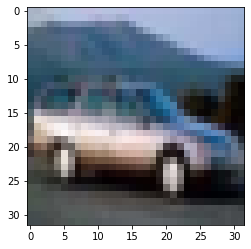

In [3]:
hinh = x_train[4]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('hinh nay la: ', y_train[4])
#0 -> airplane
#1 -> car

In [4]:
#Tao mo hinh
model = Sequential()
model.add(Dense(512, input_shape=(32*32*3,), activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [5]:
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
#compile
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy') #bộ tối ưu 'rmsprop', mất mát 'categorical_crossentropy'

#train
model.fit(x_train, y_train, epochs = 10, batch_size = 128) #lô học chỉ là 128 dữ liệu thôi (không học 60000 dữ liệu), học 10 lần -> mỗi lần học 128
#đánh giá độ chính xác
test_loss, test_acc = model.evaluate(x_test, y_test)

print('test_accuracy: ', test_acc)
print('test_loss: ', test_loss)

Epoch 1/10
391/391 [==============================] - 10s 24ms/step - loss: 2.2661 - accuracy: 0.2630
Epoch 2/10
391/391 [==============================] - 9s 24ms/step - loss: 1.8020 - accuracy: 0.3541
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 1.7196 - accuracy: 0.3887
Epoch 4/10
391/391 [==============================] - 10s 25ms/step - loss: 1.6610 - accuracy: 0.4119
Epoch 5/10
391/391 [==============================] - 10s 25ms/step - loss: 1.6197 - accuracy: 0.4285
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 1.5854 - accuracy: 0.4376
Epoch 7/10
391/391 [==============================] - 9s 23ms/step - loss: 1.5593 - accuracy: 0.4498
Epoch 8/10
391/391 [==============================] - 9s 24ms/step - loss: 1.5355 - accuracy: 0.4554
Epoch 9/10
391/391 [==============================] - 9s 24ms/step - loss: 1.5170 - accuracy: 0.4628
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 1.5841 - accu

In [9]:
#thu nghiem
from keras.utils import load_img
from keras.preprocessing.image import img_to_array

img = load_img('cat.jpg', target_size=(276,189,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 276, 189, 3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=-1)

ImportError: ignored